# AirBnB Price Checker
Welcome to our project!  

> We are working on the dataset on Kaggle: Airbnb Price Determinants in Europe  
> URL: https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe  


## Introduction
Choosing accomodation on-the-go is often a headache for travellers. Travellers on a tight budget like students need to quickly find the most value for money AirBnB, while not spending too much time researching.

**Objective**: A simple tool to predict if an AirBnB is underpriced or overpriced. This would be useful for students on a tight budget to quickly check for cheaper hotels for similar benefits.

One can also implement it in the AirBnB app, warning people about potential scams or instances where the prices are artificially marked up.

## Data Preprocessing
In this notebook, we will mainly be doing Exploratory Data Analysis (EDA) to discover the structure and nature of our dataset.

### Import Libraries and Dataset
Import essential libraries.
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [33]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

We'll be looking at London, which has the most datapoints to work with.  
We will drop the unnamed column, since there is already an index.

In [34]:
london = pd.read_csv('london_weekdays.csv')
london.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


In [35]:
london = london.drop(columns=['Unnamed: 0'])

In [36]:
london[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].apply(lambda x: x.astype('category'))

,room_type,room_shared,room_private,host_is_superhost,multi,biz
0,Entire home/apt,False,False,False,0,0
1,Private room,False,True,True,1,0
2,Private room,False,True,False,1,0
3,Private room,False,True,True,1,0
4,Private room,False,True,False,0,0
...,...,...,...,...,...,...
4609,Private room,False,True,False,0,0
4610,Entire home/apt,False,False,False,1,0
4611,Private room,False,True,False,0,0
4612,Private room,False,True,False,0,0


In [37]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     4614 non-null   float64
 1   room_type                   4614 non-null   object 
 2   room_shared                 4614 non-null   bool   
 3   room_private                4614 non-null   bool   
 4   person_capacity             4614 non-null   float64
 5   host_is_superhost           4614 non-null   bool   
 6   multi                       4614 non-null   int64  
 7   biz                         4614 non-null   int64  
 8   cleanliness_rating          4614 non-null   float64
 9   guest_satisfaction_overall  4614 non-null   float64
 10  bedrooms                    4614 non-null   int64  
 11  dist                        4614 non-null   float64
 12  metro_dist                  4614 non-null   float64
 13  attr_index                  4614 

From a quick glance through the data types:
- `realSum`, which is the value we'll be predicting
- Categorial variables like `room_type`, `room_shared`, `room_private` with Dtype `bool` and `object`
- Numeric variables like `metro_dist`, `dist`, `cleanliness_rating`
- Variables that seem numeric, but really can be categorical, like `person capacity`, `bedrooms`

We can also cross-reference with the description provided on the website.

### Data Cleaning
Now we'll be looking at how to clean the data.  
First, let's see how many null datapoints there are.  

In [38]:
# Check any number of columns with NaN or missing values 
print(london.isnull().any().sum(), ' / ', len(london.columns))
# Check any number of data points with NaN
print(london.isnull().any(axis=1).sum(), ' / ', len(london))

0  /  19
0  /  4614


Luckily for us, there are no null datapoints.  
However, we can include a simple function to drop NA rows just in case they exist in other dataset / cities.  
We can also consider using [SimpleImputer]("https://scikit-learn.org/stable/modules/impute.html"), but since our dataset is large, there is little need for that anyways.

In [39]:
london = london.dropna()
london.shape

(4614, 19)

We can use `describe()` to quickly spot extreme min/max values.  
A quick boxplot can then show us the actual outlier distribution.

In [40]:
london.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000,4614.000000
mean,360.230348,2.832466,0.269397,0.422844,9.153013,90.324447,1.123754,5.325023,0.992739,296.466825,20.607738,629.790258,11.276920,-0.114886,51.503262
std,507.782888,1.240572,0.443695,0.494065,1.183012,11.755838,0.581591,2.720524,1.262465,172.440566,11.986535,389.953206,6.982438,0.068183,0.031465
min,64.676968,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.040553,0.013904,68.740487,4.778228,140.521726,2.516159,-0.251700,51.416510
25%,167.454550,2.000000,0.000000,0.000000,9.000000,86.000000,1.000000,3.553956,0.317995,178.041401,12.375855,386.186620,6.914994,-0.171242,51.486300
50%,256.355982,2.000000,0.000000,0.000000,9.000000,93.000000,1.000000,4.899843,0.523462,251.181941,17.459935,530.331957,9.496036,-0.118225,51.509800
75%,435.452386,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,6.835232,1.047957,361.797354,25.148936,775.523995,13.886404,-0.067260,51.524698
max,15499.894165,6.000000,1.000000,1.000000,10.000000,100.000000,8.000000,17.321206,9.286229,1438.618956,100.000000,5584.771840,100.000000,0.120180,51.575820


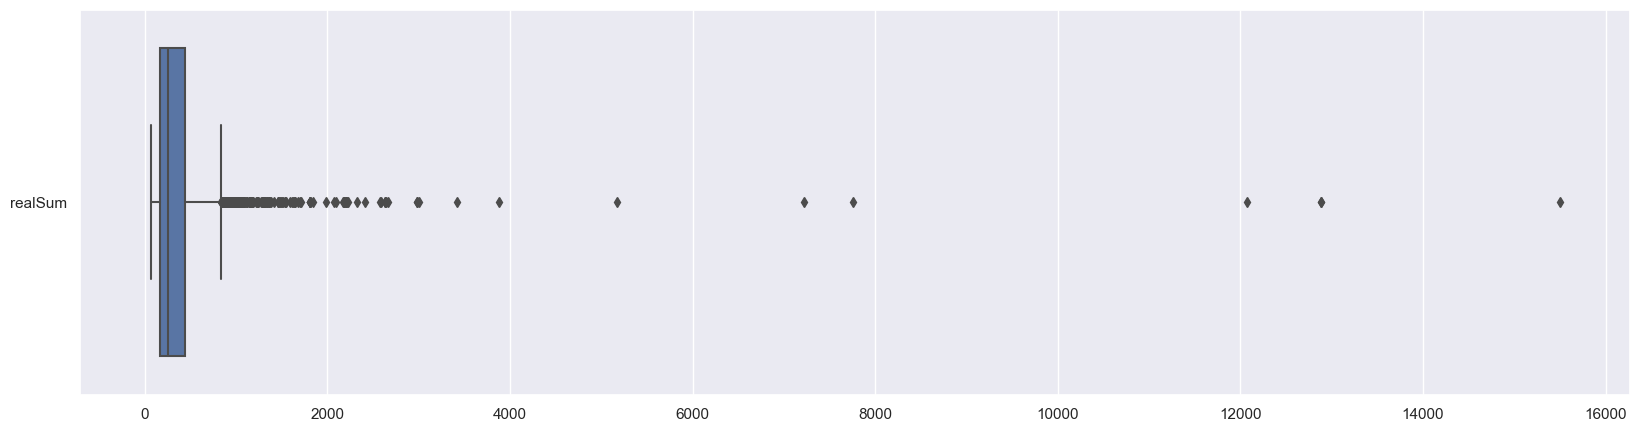

In [41]:
def plotbox(var):
    rs = london[[var]]
    f, axes = plt.subplots(1, 1, figsize=(20, 5))
    sb.boxplot(data = rs, orient = "h")

plotbox('realSum')

Of course, we see that `realSum` clearly has a substantial number of outliers.  
We decide to clean away the outliers beyond the whiskers.  
We also print the shape, just to check if we have overdo the cleaning.  

In [42]:
#To remove outliers from realSum 
# Calculate the quartiles
Q1 = london['realSum'].quantile(0.25)
Q3 = london['realSum'].quantile(0.75)

# Remove outliers of realSum
london = london.loc[((london['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & (london['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]
london.shape

(4367, 19)

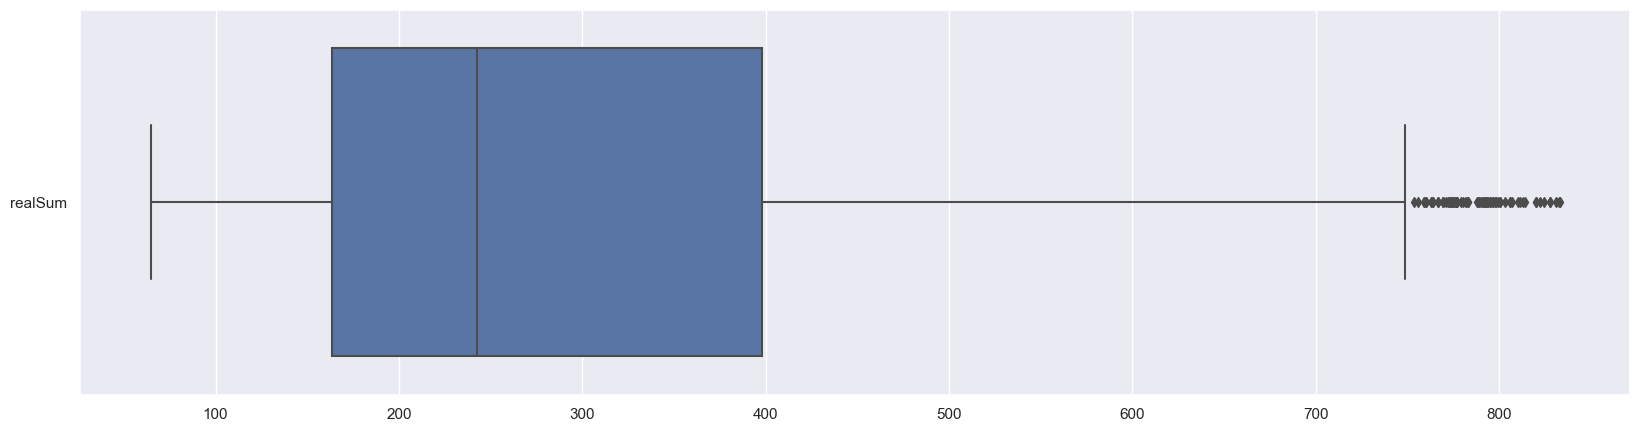

In [43]:
plotbox('realSum')

4367 out of the original 4614.  
Seems pretty good. Let's begin our analysis.

### Numerical Variables
Column Name | Description
----------- | -----------
`realSum` | The total price of the Airbnb listing. (Numeric)
`person_capacity` | The maximum number of people that can be accommodated in a single listing. (Numeric)
`cleanliness_rating` | The rating associated with how clean an individual property was after guests stayed at it. (Numeric)
`guest_satisfaction_overall` | The overall rating which shows how satisfied are guests with their stay after visiting an Airbnb property. (Numeric)
`dist` | Distance from city centre associated with every rental property. (Measurement may vary depending upon scale eg kilometers/miles etc )
`metro_dist` | Distance from metro station associated with every rental property. (Measurement may vary depending upon scale eg kilometers/miles etc )
`attr_index_norm` | Attraction index normalised. High probably means close to many attractions.
`rest_index_norm` | Restaurant index normalised. High probably means close to many restaurants.

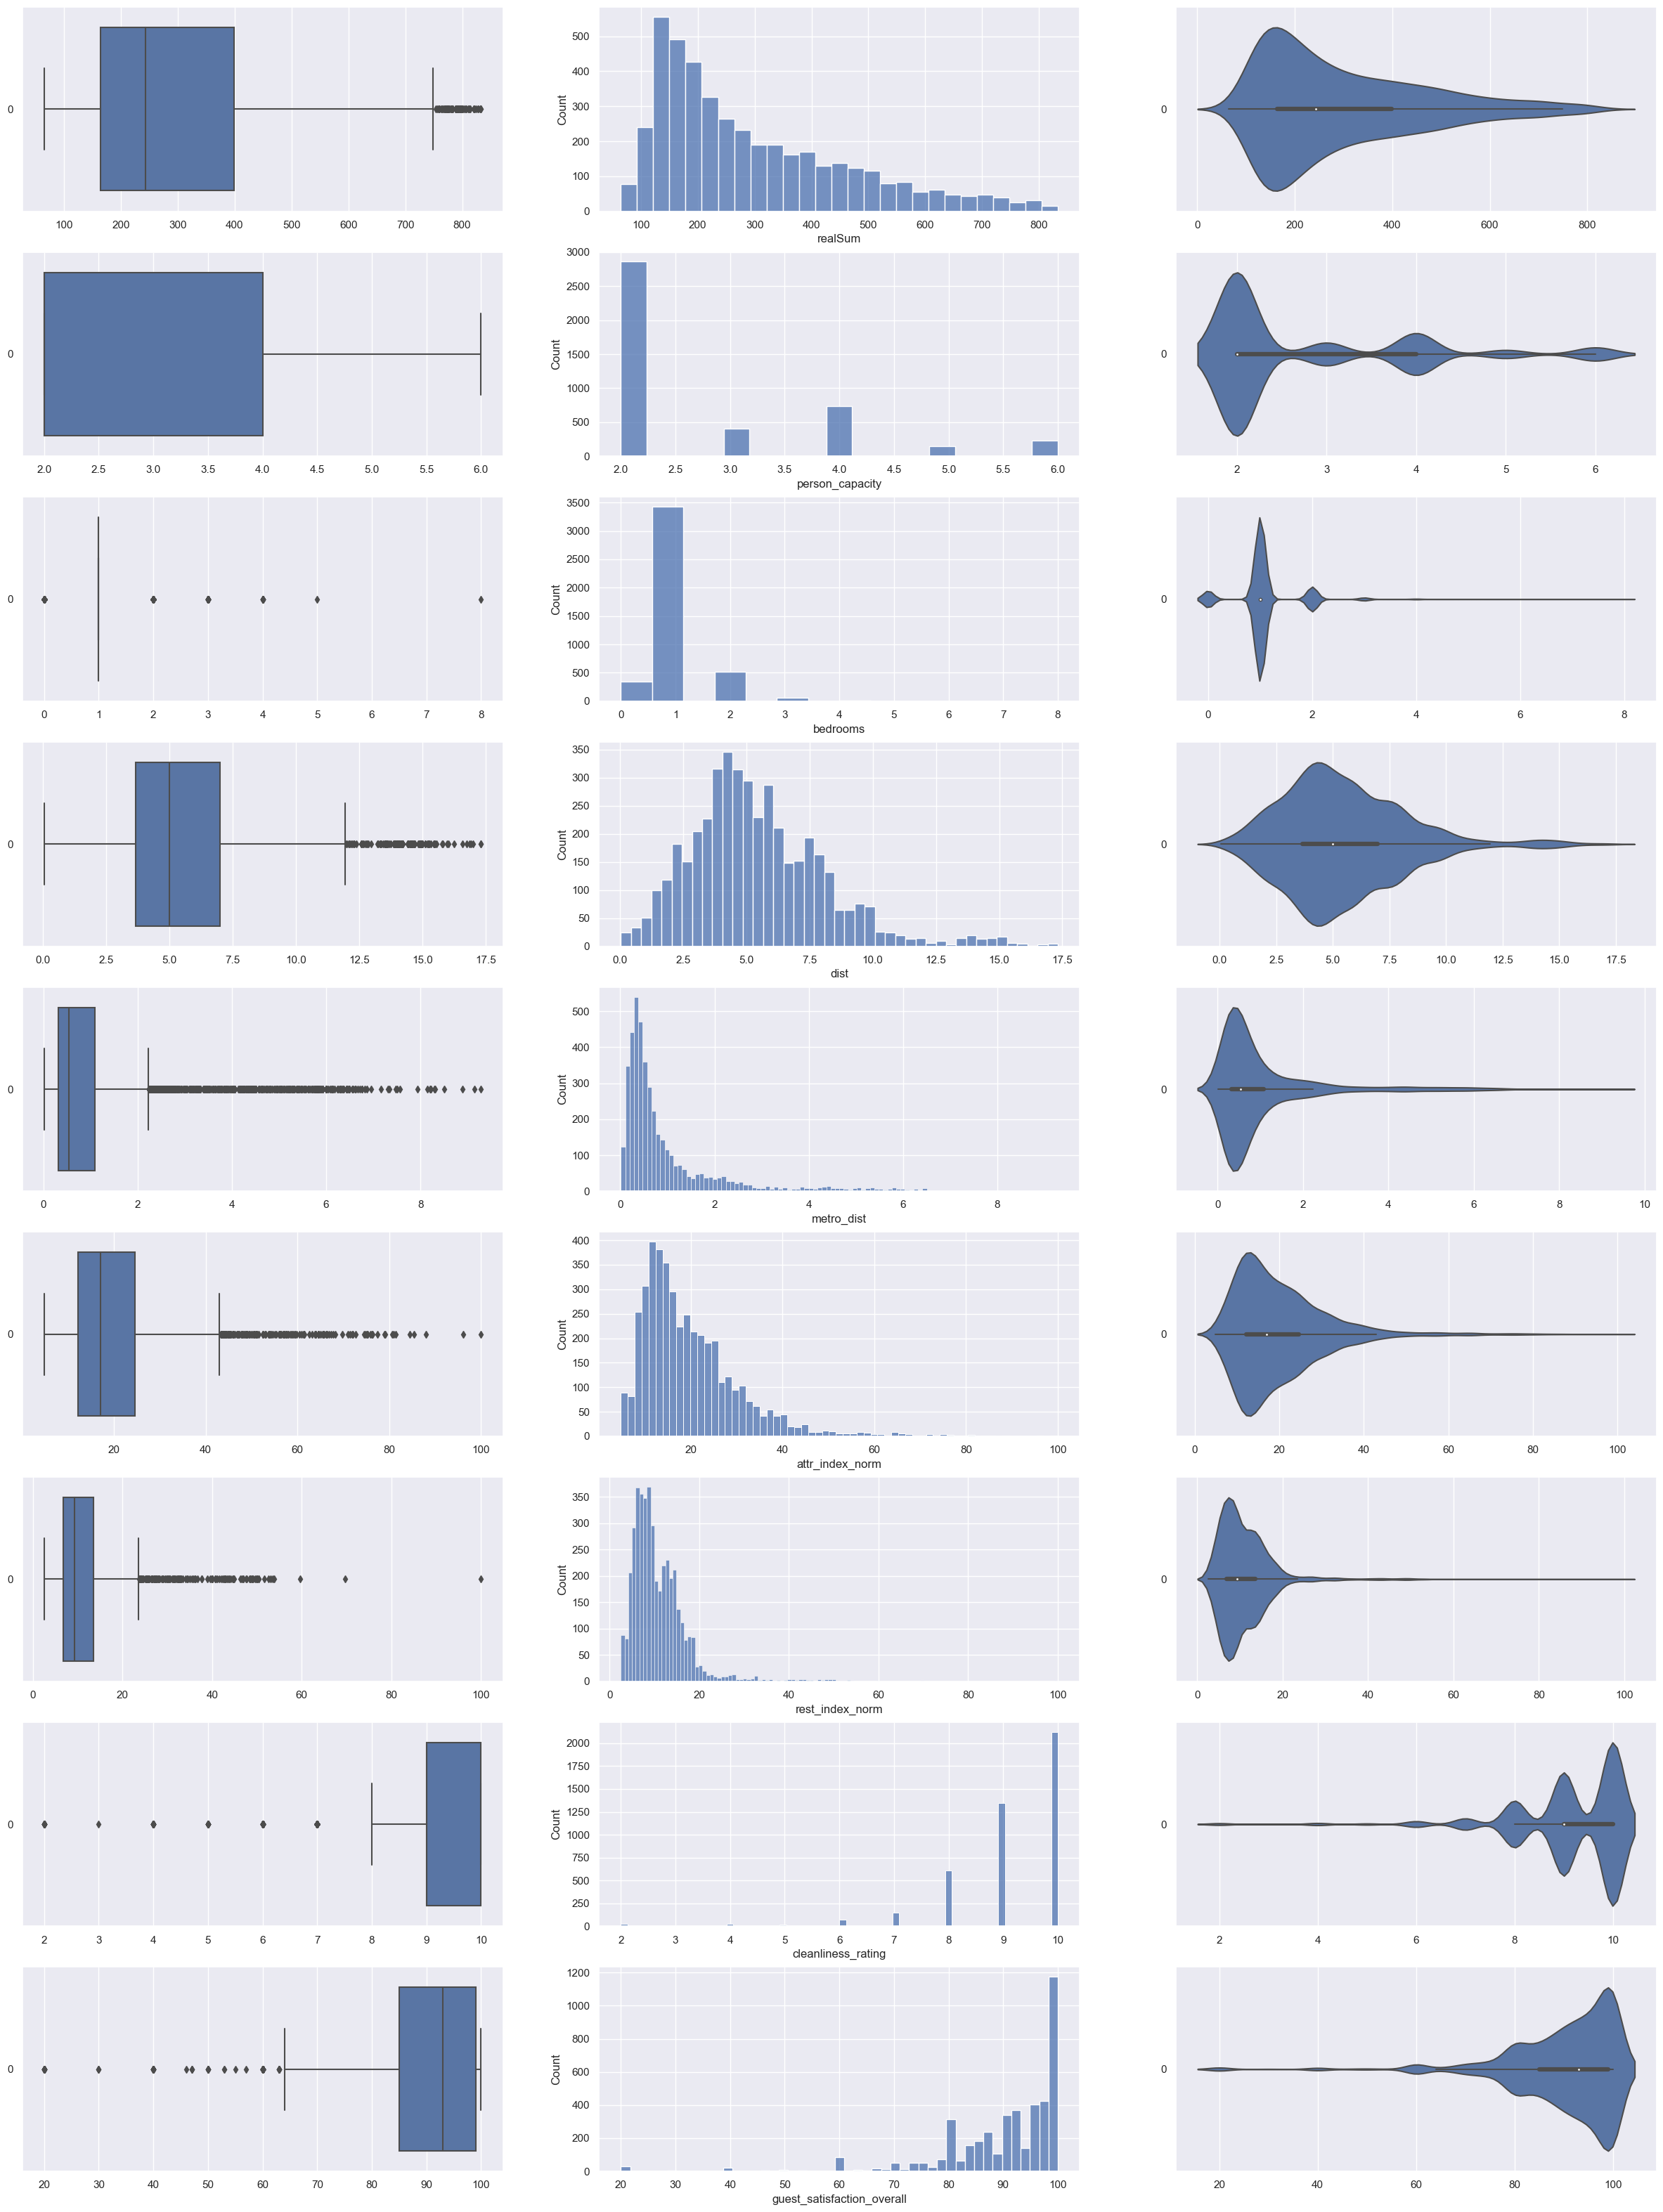

In [44]:
# Draw the distributions of numerical variables
f, axes = plt.subplots(9, 3, figsize=(30, 40))

#list of col 
numVar  = london[['realSum', 'person_capacity', 'bedrooms', 'dist', 'metro_dist', 'attr_index_norm', 'rest_index_norm', 'cleanliness_rating', 'guest_satisfaction_overall']]
count = 0
for var in numVar:
    sb.boxplot(data = numVar[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numVar[var], ax = axes[count,1])
    sb.violinplot(data = numVar[var], orient = "h", ax = axes[count,2])
    count += 1

Some Observation:  
- `guest_satisfaction_overall` is highly skewed to the right. The median is above 90.
- `attr_index_norm` and `rest_index_norm` is skewed to the left. Median is less than 20.
- Almost all data are 1 bedroom only.

We tried to use `guest_satisfaction_overall` to verify our models,  
but it might not be very reliable due to its skewness.


Now let's move on to correlation.

                             realSum  person_capacity  bedrooms      dist  \
realSum                     1.000000         0.588251  0.330654 -0.332713   
person_capacity             0.588251         1.000000  0.511207 -0.056377   
bedrooms                    0.330654         0.511207  1.000000  0.088184   
dist                       -0.332713        -0.056377  0.088184  1.000000   
metro_dist                 -0.251786        -0.036336  0.096386  0.693996   
attr_index_norm             0.344717         0.047668 -0.085347 -0.807646   
rest_index_norm             0.347559         0.055685 -0.086925 -0.752067   
cleanliness_rating          0.015998        -0.097194  0.019699  0.072796   
guest_satisfaction_overall -0.036584        -0.101165  0.054257  0.099561   

                            metro_dist  attr_index_norm  rest_index_norm  \
realSum                      -0.251786         0.344717         0.347559   
person_capacity              -0.036336         0.047668         0.055685   
b

<Axes: >

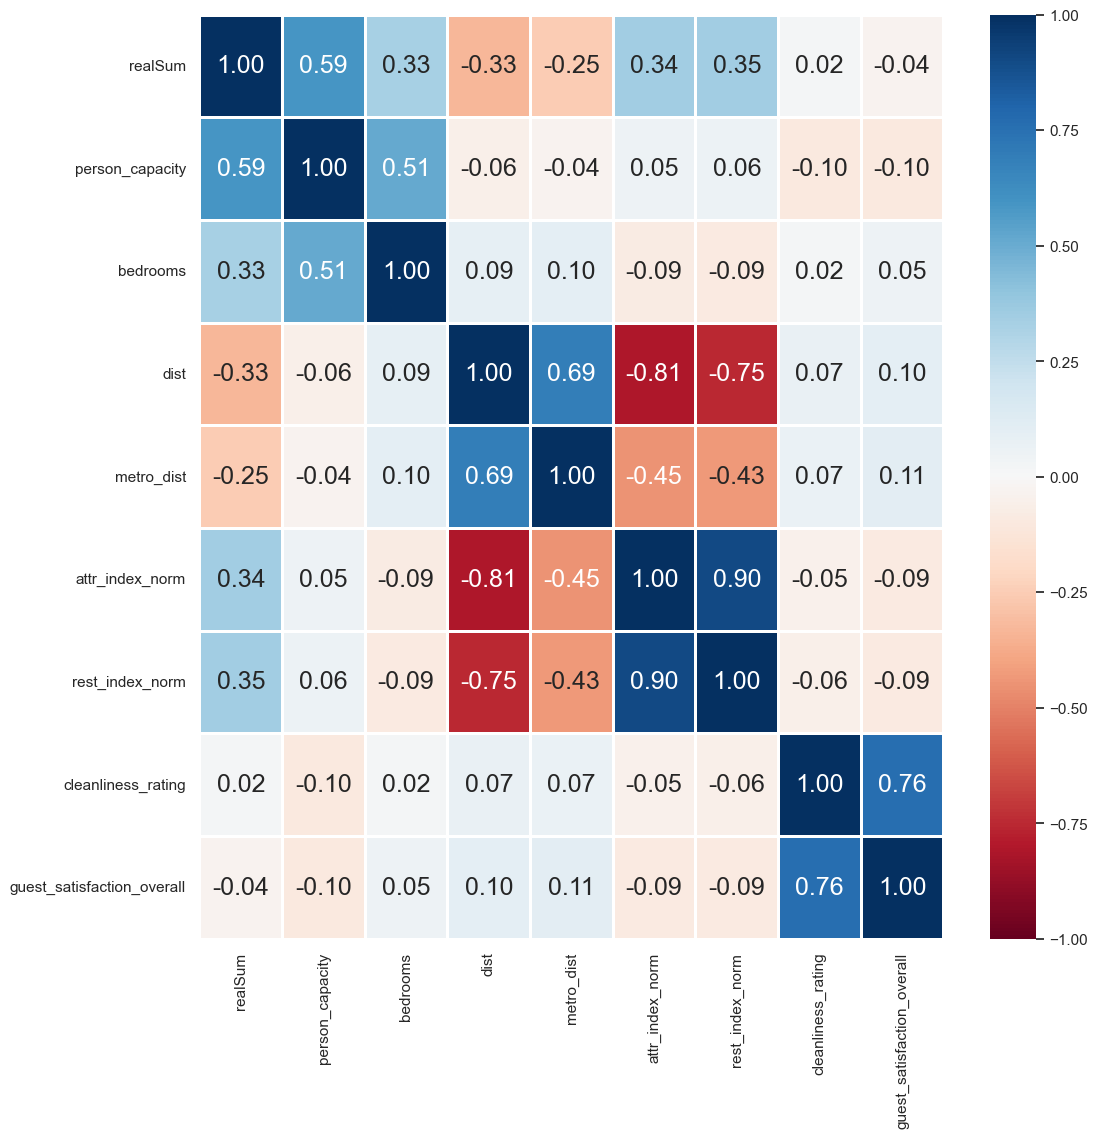

In [45]:
# Correlation Matrix
print(numVar.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(numVar.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

From the correlaion matrix,
- `person_capacity` and `bedrooms` has surprisingly low correlation
- `dist` has high correlation on `attr_index_norm` and `rest_index_norm`. Which make sense, but not always the case especially for restaurants.
- `cleanliness_rating` and `guest_satisfaction_overall` has a quite high correlation, but almost no correlation with price.
- `person_capacity` has the highest correlation with price among all the variables, but not much either.

### Categorical Variables
Column Name | Description
----------- | -----------
`realSum` | The total price of the Airbnb listing. (Numeric)
`room_type` | The type of room offered (e.g. private room, shared room, entire home/apt). (Categorical)
`room_shared` | Whether the room is shared or not. (Boolean)
`room_private` | Whether the room is private or not. (Boolean)
`host_is_superhost` | Whether or not a particular host is identified as a superhost on Airbnb. (Boolean)
`multi` | Whether it’s for multiple rooms or not
`biz` | Whether it’s for business use or family use

In [46]:
catVar = pd.DataFrame(london[['realSum', 'room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']])
catVar.head()

,realSum,room_type,room_shared,room_private,host_is_superhost,multi,biz
0,570.098074,Entire home/apt,False,False,False,0,0
1,297.984430,Private room,False,True,True,1,0
2,336.790611,Private room,False,True,False,1,0
3,226.722171,Private room,False,True,True,1,0
4,256.355982,Private room,False,True,False,0,0


Now to check correlation with price, we plot them on the boxplot to the same scale.  

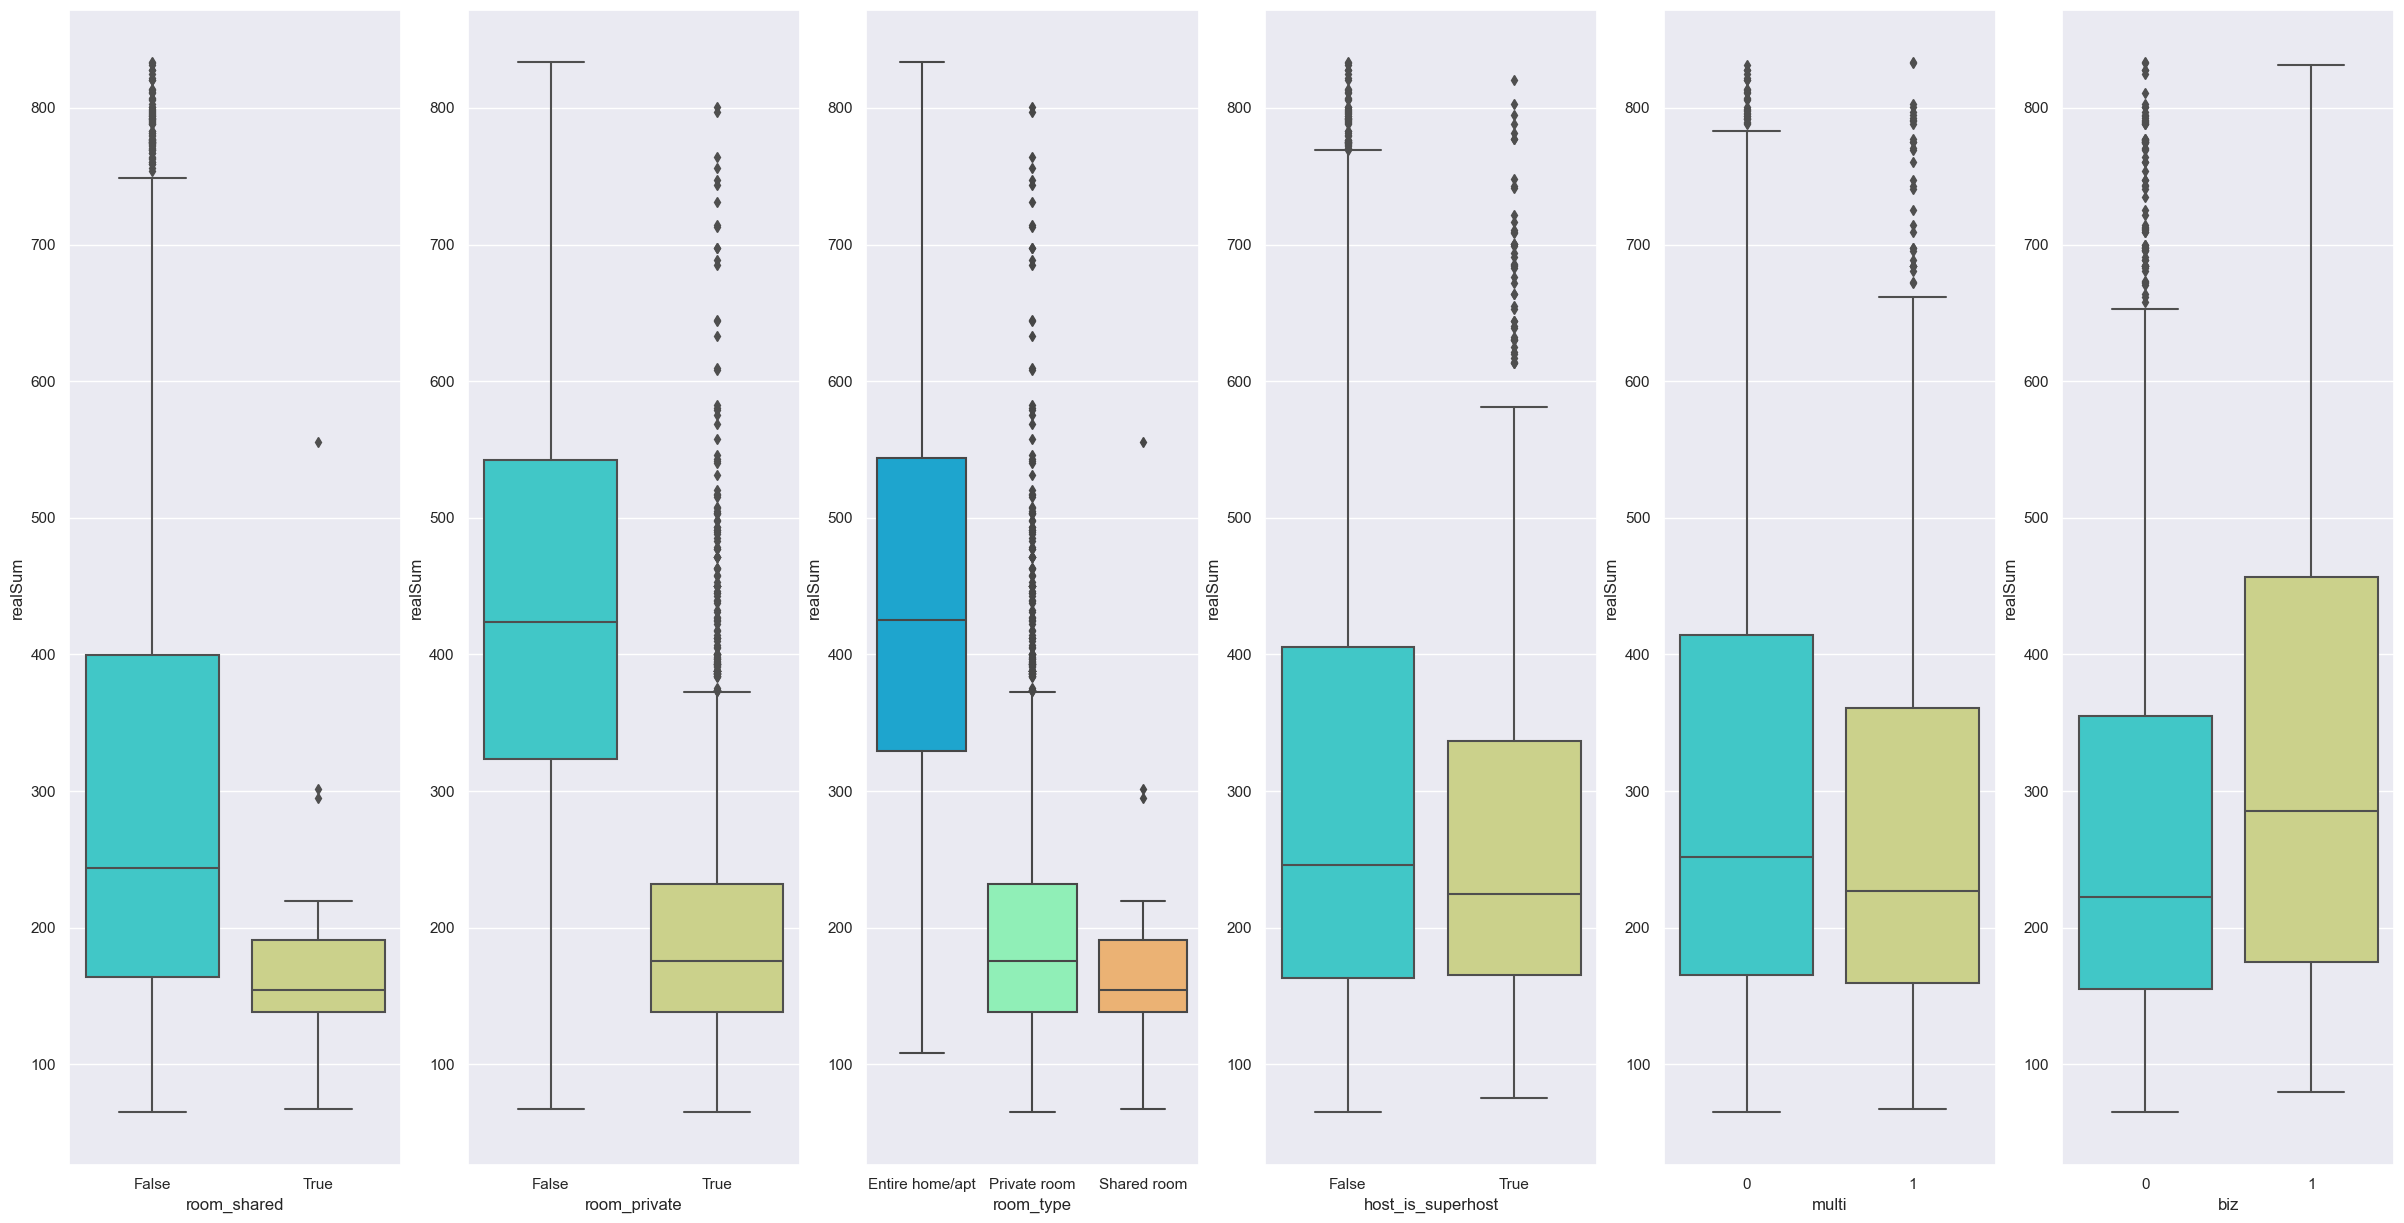

In [47]:
analyse_var = ['room_shared', 'room_private', 'room_type', 'host_is_superhost', 'multi', 'biz']
f, axes = plt.subplots(1, 6, figsize=(30, 15))
count = 0
for var in analyse_var:
    sb.boxplot(x=var, y="realSum", data=london, palette='rainbow', ax = axes[count])
    count += 1

We can notice that `room_type` is basically encompasses `room_shared` and `room_private`.  
However, `host_is_superhost` and `multi` has almost no correlation with price.  
Slightly more for `biz` but still barely correlated.  
Also note that Private room has alot of outliers AFTER our cleaning.

<Axes: xlabel='person_capacity', ylabel='realSum'>

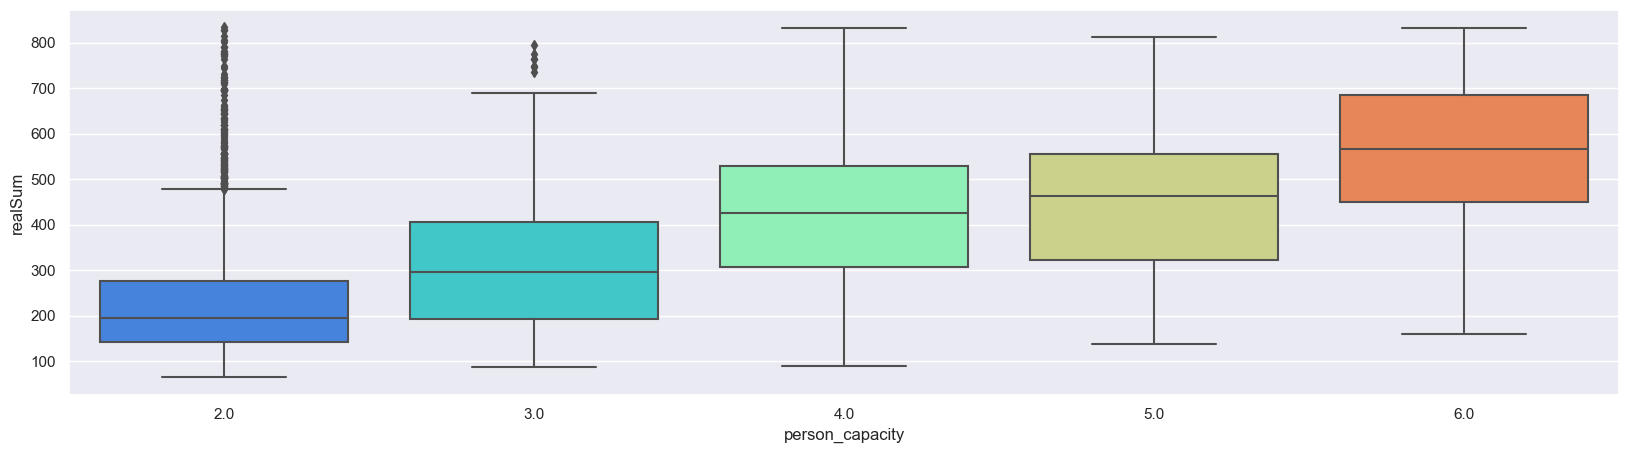

In [48]:
f, axes = plt.subplots(1, 1, figsize=(20, 5))
sb.boxplot(x="person_capacity", y="realSum", data=london, palette='rainbow')

We can encode `room_type` into ordinal integers by ordering them in terms of price.
- Shared Room: least expensive
- Private Room
- Entire hom/apt: most expensive

In [49]:
london["room_type"] =  london["room_type"].replace({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
london["room_type"]

0       2
1       1
2       1
3       1
4       1
       ..
4609    1
4610    2
4611    1
4612    1
4613    2
Name: room_type, Length: 4367, dtype: int64

### Combining Numeric with Categorical variables
We have singled out the important variables.  
Now let's combine them for a final visualization, and we're good to go!

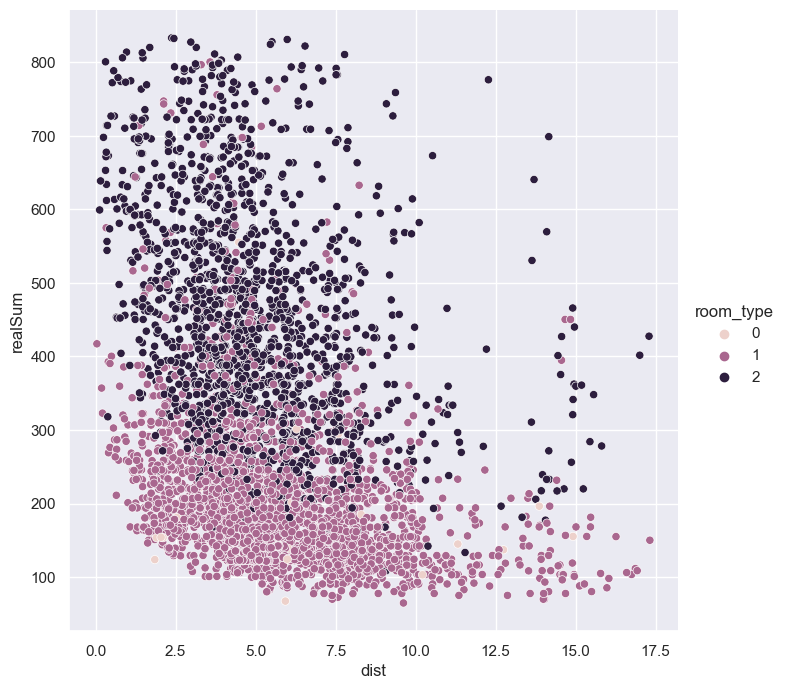

In [50]:
sb.pairplot(data=london, x_vars="dist", y_vars="realSum", hue='room_type', height=7)

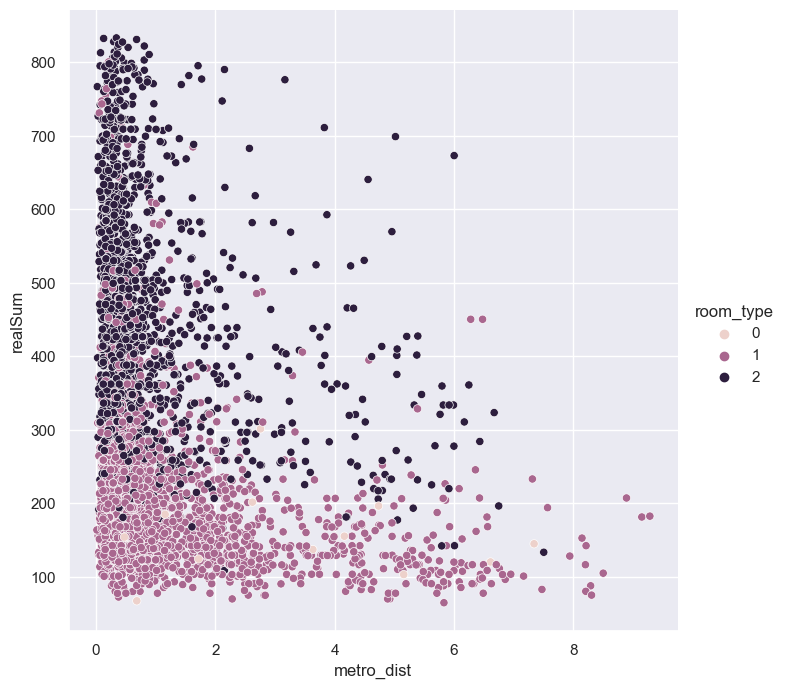

In [51]:
sb.pairplot(data=london, x_vars="metro_dist", y_vars="realSum", hue='room_type', height=7)

From these graphs, we can see that room type 2, `Entire home/apt`, tend to cost more.


### Wrapping Up

We can combine everything we did to the data into a function, which can be reused by other notebooks.

In [86]:
def clean_data(df):
    #return dataframe
    #remove NULL Columns from dataframe 
    df = df.drop(columns=['Unnamed: 0'])

    # remove rows with na
    df = df.dropna()

    #remove outliers 'realSum' from dataframe 
    Q1 = df['realSum'].quantile(0.25)
    Q3 = df['realSum'].quantile(0.75)
    df = df.loc[(( df['realSum'] > (Q1 - 1.5 * (Q3 - Q1))) & ( df['realSum'] < (Q3 + 1.5 * (Q3 - Q1))))]

    #Apply categorical label to columns 
    df[['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'multi', 'biz']].apply(lambda x: x.astype('category'))

    #Convert Roomtype to oridinal 
    df["room_type"] =  df["room_type"].replace({'Shared room': 0, 'Private room': 1, 'Entire home/apt': 2})
    
    return df

### 